#Animal classification

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d saumyamohandas/animal-dataset

Dataset URL: https://www.kaggle.com/datasets/saumyamohandas/animal-dataset
License(s): unknown
 95% 59.0M/62.3M [00:00<00:00, 143MB/s]
100% 62.3M/62.3M [00:00<00:00, 128MB/s]


In [5]:
!unzip /content/animal-dataset.zip

Archive:  /content/animal-dataset.zip
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Testing/bears/k4 (73).jpeg  
  inflating: dataset/Testing/bears/k4 (73).jpg  
  in

##Data Augmentation

In [6]:
#importing necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
#data augmentation for the training variable
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

In [8]:
#data augmentation for the testing variable
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
#data augmentation on the training data
x_train=train_datagen.flow_from_directory('/content/dataset/Training',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 1238 images belonging to 4 classes.


In [13]:
#to know the what are the classes in the training data
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [14]:
#data augmentation on the testing data
x_test=test_datagen.flow_from_directory('/content/dataset/Testing',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 326 images belonging to 4 classes.


##CNN Model Building

In [15]:
#importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [16]:
#adding layers
model=Sequential()

In [17]:
#convolution layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
#maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
#flatten layer
model.add(Flatten())

In [20]:
model.add(Dense(300,activation='relu'))   #hidden layer-1
model.add(Dense(150,activation='relu'))   #hidden layer-2
model.add(Dense(4,activation='softmax'))  #output layer

In [21]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
#train the model
model.fit(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 570ms/step - accuracy: 0.2873 - loss: 3.5957 - val_accuracy: 0.3252 - val_loss: 1.3646
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 309ms/step - accuracy: 0.3411 - loss: 1.3126 - val_accuracy: 0.4417 - val_loss: 1.2532
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 385ms/step - accuracy: 0.4646 - loss: 1.1914 - val_accuracy: 0.6656 - val_loss: 0.9642
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 317ms/step - accuracy: 0.6184 - loss: 1.0053 - val_accuracy: 0.6074 - val_loss: 0.9562
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.6341 - loss: 0.8864 - val_accuracy: 0.7239 - val_loss: 0.6746
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - accuracy: 0.6764 - loss: 0.8063 - val_accuracy: 0.7301 - val_loss: 0.7264
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 319ms/step - accuracy: 0.6656 - loss: 0.8188 - val_accuracy: 0.7730 - val_loss: 0.6664
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 392ms/step - accuracy: 0.7195 - loss: 0.7107 - val_accuracy: 0

In [25]:
#save the model
model.save('animal.h5')
model.save('animal.keras')

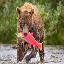

In [30]:
#test the model
from tensorflow.keras.preprocessing import image
import numpy as np
#for testing
img=image.load_img('/content/dataset/Testing/bears/k4 (110).jpeg',target_size=(64,64))
img

In [31]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['bears','crows','elephants','rats']
op[pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'bears'

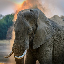

In [40]:
img1=image.load_img('/content/dataset/Testing/elephants/pexels_photo_1054672.jpeg',target_size=(64,64))
img1

In [43]:
x1=image.img_to_array(img1)
x1=np.expand_dims(x1,axis=0)
pred1=np.argmax(model.predict(x1))
op1=['bears','crows','elephants','rats']
op1[pred1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'elephants'

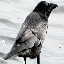

In [44]:
img2=image.load_img('/content/dataset/Testing/crows/Z1  (36).jpg',target_size=(64,64))
img2

In [45]:
x1=image.img_to_array(img2)
x1=np.expand_dims(x1,axis=0)
pred1=np.argmax(model.predict(x1))
op1=['bears','crows','elephants','rats']
op1[pred1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


'crows'

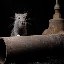

In [49]:
img3=image.load_img('/content/dataset/Testing/rats/images (46).jpeg',target_size=(64,64))
img3

In [50]:
x1=image.img_to_array(img3)
x1=np.expand_dims(x1,axis=0)
pred1=np.argmax(model.predict(x1))
op1=['bears','crows','elephants','rats']
op1[pred1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'rats'